## Load, plot, edit Actiwatch AWD file

JWE 10Mar19

This python notebook is designed to help edit the 'on' and 'off' wrist segment markers in an actigraphy AWD file.  It is meant to be run cell by cell... You can try running all of them at once, nothing bad will happen, but maybe nothing good either.

The AWD file format is assumed to be a space separated text file and have a header with 7 rows. The two columns of data are assumed to be activity and marker (which is an M).

Any markers in the AWD file are matched up with transition points (TP) between segments of higher and lower activiy (counts over or below 40 over a weighted 5 minute window centered on the time point, respectively).  If a sleep log file (csv) exists then the markers are matched up with data in this file.  The sleep log file markers are assumed to be pairs and take timing precedence over the TPs.

If there are no markers in the file, never fear, low activity segments are used to establish guessed markers (z).  Do note that this tends to detect sleep period (not fully contiguously) or naps in addition to off watch periods.

The markers found in the AWD file, log file and guessed markers are output to an Mtimes csv file which is a listing of dates and times along with the marker code.  M for marker, z for guessed marker.  This Mtimes file can be edited at will and read back in.  Note that the programs assume a smart user who will list a pair of time points per segment i.e. an 'on' time and and 'off' time.

In order to help with segment identification there is also a rudimentary plotting program that will plot activity data along with marked segments or comments from a sleep log file if it exists.  Any number of marked segments can be displayed as long as they are identified with a different letter.  Activity data can be plotted as single or double day.  Plotting takes a long time (on the order of minutes).

Finally (or maybe this should have been mentioned first), data can be clipped to a subset of the recorded data before the markers are generated.  Note that currently it is assumed the log data are within the clipped limits.

In this notebook, the data is read and marker file and data file (with time stamps) are written out  Two plots are then made: te first plot is of the detected markers and log file data (if any), the second is the detected and guessed markers.  There is also a cell to read the marker file is also (assumed to be edited) and a new plot is made of the markers found in the file.  Lastly, there is a cell to write out the edited marker and activity data to a csv file.

Disclaimer:  The marker identification function does a pretty good job but isn't perfect; especially given the fact that there's no way of telling whether low activity periods are off watch segments from the data itself. The marker file does let the user switch any guessed markers to actual markers, adjust the timing of the markers, or remove errant marked segments.  No complaints about marker detection will be entertained!  There may also be oddities with display, most of these are just display issues rather than marker issues at this point.

Lastly, it is possible to restrict the markers that are written out to the final data or marker file to a single type.


Import required libraries

In [1]:
import read_awd as ra
import importlib

/Users/evansjw/miniconda3/lib/python3.6/site-packages/matplotlib/backends/tkagg.py:10: MatplotlibDeprecationWarning: 
The matplotlib.backends.tkagg module is deprecated.
  "3.0", "The matplotlib.backends.tkagg module is deprecated.")


Set up participant and file information.

### Edit this part

In [68]:
# filname prefix (usally the subject inits)
sub = 'FLVA' 
# data directory
dat_dir = 'data/nc'

fn = dat_dir +'/' + sub +'.AWD'
lim = ['22-Feb-16 12:00 AM','12-Mar-16 11:59 PM']
#lim = ['11-Apr-16 12:00 AM','04-May-16 11:59 PM']
#lim=[]

### Just run the rest of the cells... 
The cell defaults can be tweaked but should run as is...

Read in the data, clip to dates if required, get markers and write markers out to file.

In [69]:
importlib.reload(ra)
# read the data
awd_dat = ra.read_AWD(fn)

print('start: ',awd_dat['DateTime'][0])
print('stop: ',awd_dat['DateTime'][-1])

#clip_data
if lim:
    clip_dat = ra.clip_dat(lim,awd_dat)
else:
    clip_dat = awd_dat

# despike
dat=ra.despike(clip_dat['activity'],4,10)
clip_dat['dat'] = dat

# get markers
mk_idx,comments = ra.get_markers(clip_dat)

# write markers
if comments:
    ra.write_Mtimes(clip_dat,mk_idx,sub,comments)
else:
    ra.write_Mtimes(clip_dat,mk_idx,sub)
    
# write data
ra.write_dat(clip_dat,mk_idx,sub)

start:  17-Feb-16 12:37 PM
stop:  24-Mar-16 08:56 AM


### Plotting


Plot the markers and log data (if there is any - need to add check) and saves to png.

20
22-Feb-16
0 1439
input 0 []
input 1 [-955, 1245]
plot this [-955, 1245]
input 2 [-960, 1250]
plot this [-960, 1250]
[0]
23-Feb-16
1440 2879
input 0 []
input 1 [-1950, 2022, -2219, 2343, -2595, 2632]
plot this [-1950, 2022, -2219, 2343, -2595, 2632]
input 2 [-1954, 2027, -2224, 2348, -2600, 2636]
plot this [-1954, 2027, -2224, 2348, -2600, 2636]
[1 2 3]
24-Feb-16
2880 4319
input 0 []
input 1 [-3777, 3859]
plot this [-3777, 3859]
input 2 [-3780, 3865]
plot this [-3780, 3865]
[4]
25-Feb-16
4320 5759
input 0 []
input 1 [-4815, 4887, -5357, 5458, -5691, 5716]
plot this [-4815, 4887, -5357, 5458, -5691, 5716]
input 2 [-4820, 4890, -5360, 5462, -5695, 5720]
plot this [-4820, 4890, -5360, 5462, -5695, 5720]
[5 6 7]
26-Feb-16
5760 7199
input 0 []
input 1 [-6891, 6905]
plot this [-6891, 6905]
input 2 [-6895, 6910]
plot this [-6895, 6910]
[8]
27-Feb-16
7200 8639
input 0 []
input 1 [-7212, 7226, -8071, 8087]
plot this [-7212, 7226, -8071, 8087]
input 2 [-7215, 7230, -8075, 8090]
plot this [-721

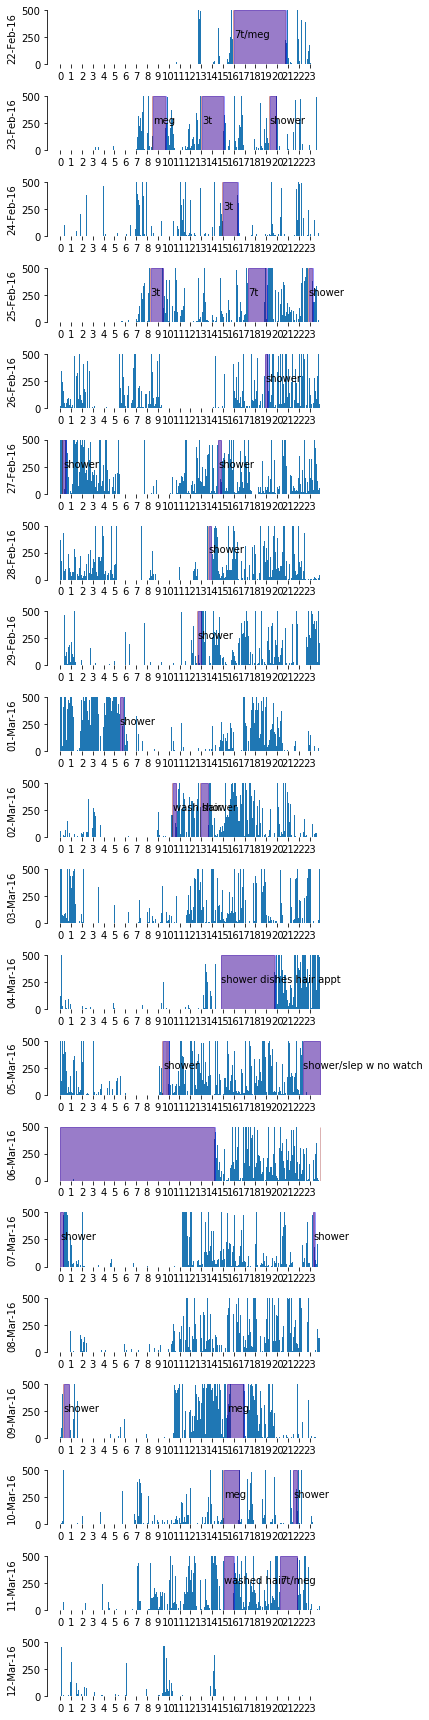

In [70]:
importlib.reload(ra)
if comments:
    ra.plot_awd(clip_dat,{'':[],'m':mk_idx['m'],'l':mk_idx['l']},show=False,fn_pref=sub+'_M+log',comments=comments,max_act=500,debug=True)
else:
    print('no log data')

### Plot the guessed markers too

24
11-Apr-16
0 1439
input 0 [-659, 673]
plot this [-659, 673]
input 1 []
input 2 [0, 535, -541, 657, -995, 1019, -1047, 1083, -1089, 1103, -1237, 1257, -1315, 1367]
plot this [0, 535, -541, 657, -995, 1019, -1047, 1083, -1089, 1103, -1237, 1257, -1315, 1367]
12-Apr-16
1440 2879
input 0 [-2484, 2547]
plot this [-2484, 2547]
input 1 [-2483, 2545]
plot this [-2483, 2545]
input 2 [-1523, 1549, -1583, 1781, -1793, 1817, -1825, 1849, -1855, 2063, -2073, 2099, -2493, 2543]
plot this [-1523, 1549, -1583, 1781, -1793, 1817, -1825, 1849, -1855, 2063, -2073, 2099, -2493, 2543]
13-Apr-16
2880 4319
input 0 []
input 1 []
input 2 [-2965, 2977, -2987, 3001, -3073, 3091, -3179, 3535, -4017, 4075, -4087, 4123]
plot this [-2965, 2977, -2987, 3001, -3073, 3091, -3179, 3535, -4017, 4075, -4087, 4123]
14-Apr-16
4320 5759
input 0 [-5646, 5676]
plot this [-5646, 5676]
input 1 [-5646, 5675]
plot this [-5646, 5675]
input 2 [-4363, 4381, -4407, 4481, -4487, 4715, -4721, 4879, -4951, 4967, -4989, 5007, -5079, 509

input 0 [-32456, 32534]
plot this [-32456, 32534]
input 1 [-32453, 32531]
plot this [-32453, 32531]
input 2 [31695, -31701, 31847, -31857, 32203, -32267, 32281, -32457, 32531, -32657, 32671, -32709, 32767, -32799, 32821, -33083, 33107]
plot this [-31680, 31695, -31701, 31847, -31857, 32203, -32267, 32281, -32457, 32531, -32657, 32671, -32709, 32767, -32799, 32821, -33083, 33107]
04-May-16
33120 34558
input 0 [-33159, 33169]
plot this [-33159, 33169]
input 1 []
input 2 [-33167, 33193, -33215, 33431, -33437, 33521, -33527, 33683, -33735, 33817, -34383, 34397, -34421, 34435, -34491, 34513]
plot this [-33167, 33193, -33215, 33431, -33437, 33521, -33527, 33683, -33735, 33817, -34383, 34397, -34421, 34435, -34491, 34513]
Saving... LYRA_M+guess.png
Done


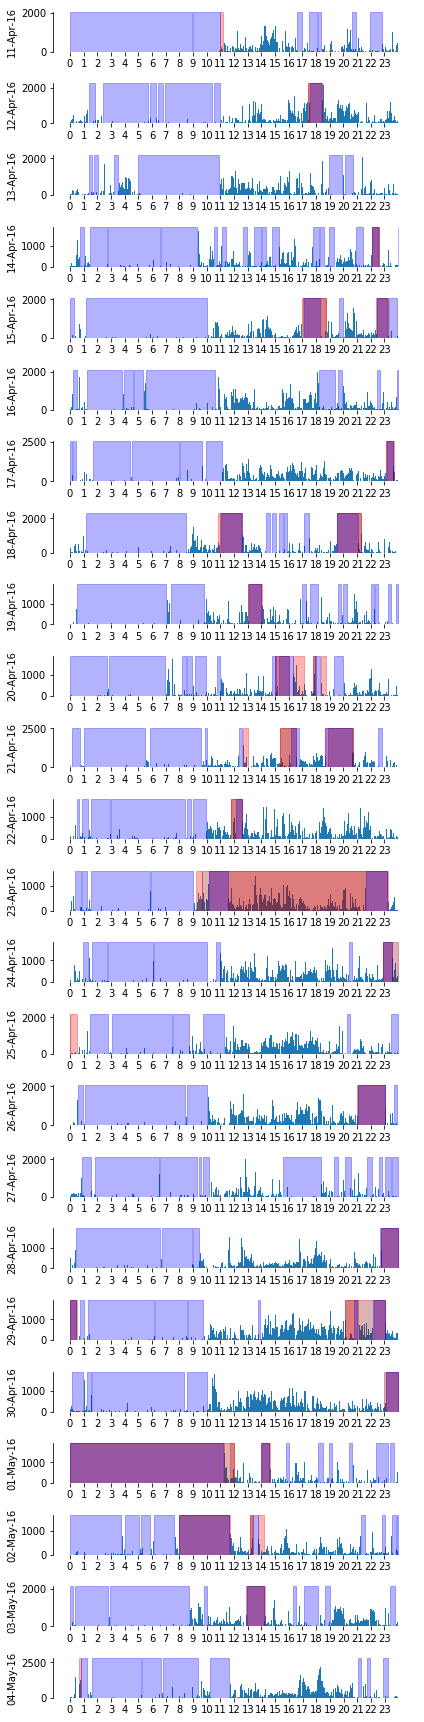

In [63]:
importlib.reload(ra)
try:
    ra.plot_awd(clip_dat,{'m':mk_idx['m'],'l':mk_idx['l'],'z':mk_idx['z']},show=False,fn_pref=sub+'_M+guess',plot_type='single',debug=True)
except:
    ra.plot_awd(clip_dat,{'m':mk_idx['m'],'':[],'z':mk_idx['z']},show=False,plot_type='single',fn_pref=sub+'_M+guess')

### Load edited file

In [113]:
importlib.reload(ra)
Mtimes,new_mk_idx = ra.read_marker(sub +'_Mtimes.csv',clip_dat)

Plot the new markers

46
07-Apr-16
0 899
input 0 []
input 1 []
input 2 [0]
plot this [0, 899]
08-Apr-16
900 2339
input 0 []
input 1 []
input 2 []
09-Apr-16
2340 3779
input 0 []
input 1 []
input 2 []
10-Apr-16
3780 5219
input 0 []
input 1 []
input 2 []
11-Apr-16
5220 6659
input 0 []
input 1 [-5879, 5893]
plot this [-5879, 5893]
input 2 [5755, -5761, 5877, -6215, 6239, -6267, 6303, -6309, 6323, -6457, 6477, -6535, 6587]
plot this [-5220, 5755, -5761, 5877, -6215, 6239, -6267, 6303, -6309, 6323, -6457, 6477, -6535, 6587]
12-Apr-16
6660 8099
input 0 [-7703, 7765]
plot this [-7703, 7765]
input 1 [-7704, 7767]
plot this [-7704, 7767]
input 2 [-6743, 6769, -6803, 7001, -7013, 7037, -7045, 7069, -7075, 7283, -7293, 7319, -7713, 7763]
plot this [-6743, 6769, -6803, 7001, -7013, 7037, -7045, 7069, -7075, 7283, -7293, 7319, -7713, 7763]
13-Apr-16
8100 9539
input 0 []
input 1 []
input 2 [-8185, 8197, -8207, 8221, -8293, 8311, -8399, 8755, -9237, 9295, -9307, 9343]
plot this [-8185, 8197, -8207, 8221, -8293, 8311, -8399

input 0 [-37673, 37751]
plot this [-37673, 37751]
input 1 [-37676, 37754]
plot this [-37676, 37754]
input 2 [36915, -36921, 37067, -37077, 37423, -37487, 37501, -37677, 37751, -37877, 37891, -37929, 37987, -38019, 38041, -38303, 38327]
plot this [-36900, 36915, -36921, 37067, -37077, 37423, -37487, 37501, -37677, 37751, -37877, 37891, -37929, 37987, -38019, 38041, -38303, 38327]
04-May-16
38340 39779
input 0 []
input 1 [-38379, 38389]
plot this [-38379, 38389]
input 2 [-38387, 38413, -38435, 38651, -38657, 38741, -38747, 38903, -38955, 39037, -39603, 39617, -39641, 39655, -39711, 39733]
plot this [-38387, 38413, -38435, 38651, -38657, 38741, -38747, 38903, -38955, 39037, -39603, 39617, -39641, 39655, -39711, 39733]
05-May-16
39780 41219
input 0 []
input 1 [-40757, 40803]
plot this [-40757, 40803]
input 2 [-39821, 40207, -40235, 40267, -40297, 40317, -40327, 40395, -40687, 40755, -40999, 41021, -41053, 41075, -41191, 41203, -41215]
plot this [-39821, 40207, -40235, 40267, -40297, 40317,

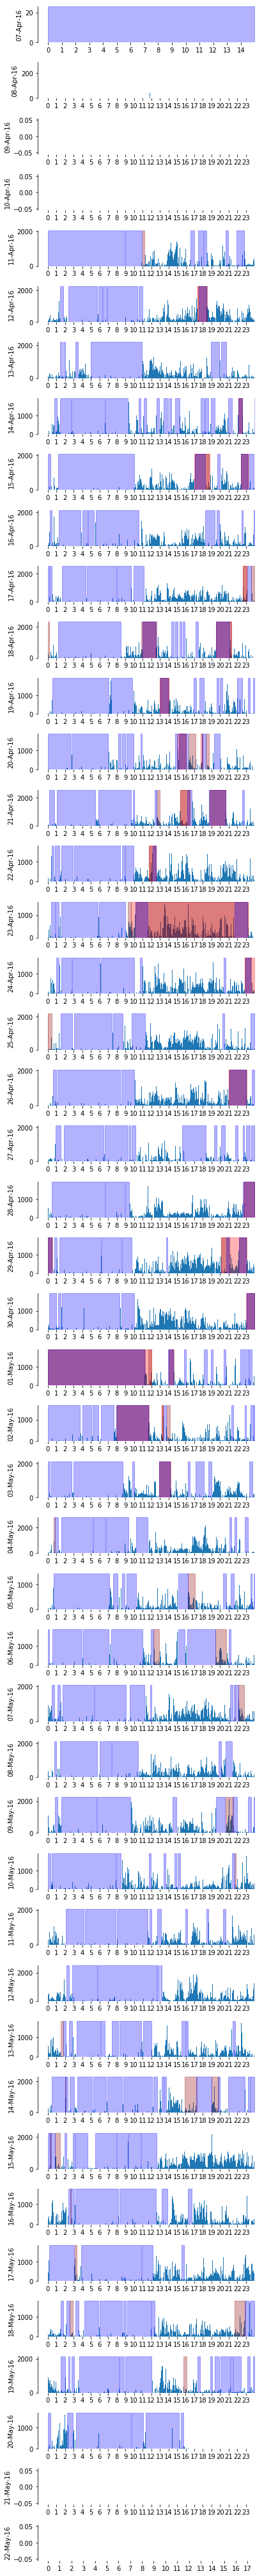

In [114]:
importlib.reload(ra)
ra.plot_awd(clip_dat,new_mk_idx,show=False,fn_pref=sub+'_Medited',debug=True)


In [85]:
importlib.reload(ra)
a = ra.write_dat(clip_dat,new_mk_idx,sub,fn_suff='edited')

In [88]:
new_mk_idx.keys()

dict_keys(['l', 'm', 'z'])

In [5]:
mk_idx['l'][0:10]

array([10866, 10895,  7703,  7765, 12000, 12105, 12324, 12374, 15248,
       15219])

In [6]:
mk_idx['m'][0:10]

array([ 5879,  5893,  7704,  7767, 10866, 10896, 12003, 12103, 12325,
       12375])